# Podstawy Sztucznej Inteligencji - Projekt Kacper Marzol

Celem tego projektu jest klasyfikacja piosenek na podstawie ich kilku cech. Zbiór danych składa się z 278 tysięcy piosenek z serwisu Spotify. Dla szybkości obliczeń, użyjemy 10% danych

In [ ]:
import pandas as pd

data = pd.read_csv("278k_labelled_uri.csv")
data=data.iloc[:500, :]
print(data.shape)
data.head()

(500, 15)


,Unnamed: 0.1,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
0,0,0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2,spotify:track:3v6sBj3swihU8pXQQHhDZo
1,1,1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO
2,2,2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1,spotify:track:2CY92qejUrhyPUASawNVRr
3,3,3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0,spotify:track:11BPfwVbB7vok7KfjBeW4k
4,4,4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1,spotify:track:3yUJKPsjvThlcQWTS9ttYx


In [ ]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'duration (ms)', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'spec_rate', 'labels', 'uri'],
      dtype='object')

Acousticness: miara akustyczności od 0 do 1
Danceability: miara taneczności od 0 do 1
Energy: miara energiczności od 0 do 1
Instrumentalness: miara instrumentalności od 0 do 1
Liveness: miara obecności publiki w nagraniu od 0 do 1
Loudness: miara głośnośći w decybelach (-60 do 0 decybeli)
Speechiness: miara słów w piosence od 0 do 1
Valence: miara od 0 do 1 opisująca pozytywność przekazywaną przez piosenkę
Tempo: tempo piosenki w BMP (uderzeń na minutę)

In [ ]:
data.labels.value_counts()

1    262
2    144
0     94
Name: labels, dtype: int64

0 - piosenka smutna
1 - piosenka wesoła
2 - piosenka energetyczna
3 - piosenka spokojna

Usuniemy zbędne kolumny, "uri", ponieważ URL piosenki nie jest potrzebny oraz dwie pierwsze kolumny

In [ ]:
cols=["Unnamed: 0.1", "Unnamed: 0","uri"]
data=data.drop(cols ,axis=1)

In [ ]:
data.head()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1


Dodamy trochę nanów do zbioru

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import random

X = data.drop('labels', axis=1)
y = data.labels

ix = [(row, col) for row in range(X.shape[0]) for col in range(X.shape[1])]
for row, col in random.sample(ix, int(round(.1*len(ix)))):
    X.iat[row, col] = np.nan

X.isna().sum()

duration (ms)       58
danceability        55
energy              52
loudness            56
speechiness         37
acousticness        52
instrumentalness    43
liveness            50
valence             49
tempo               58
spec_rate           40
dtype: int64

Podzielimy zbiór na część treningową, walidacyjną i testową:

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(X_val.shape)

(400, 11)
(400,)
(50, 11)
(50, 11)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# xplot=X_train.iloc[:50, :]
# sns.pairplot(xplot)
# plt.show()

Nauczymy kilka modeli

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

pipeline = Pipeline([("imputer", SimpleImputer(strategy="median"))])

# Logistic Regression

In [94]:
models=[]
model_names=[]
accuracy=[]


In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

def pipeline_maker(model):
    return make_pipeline(SimpleImputer(strategy="median"), StandardScaler(),model)

def test (model, param_grid_):
    pipe=pipeline_maker(model)
    search=GridSearchCV(pipe, param_grid=param_grid_,scoring='accuracy')
    search.fit(X_train, y_train)
    return search.best_estimator_, search.cv_results_

In [96]:
from sklearn.linear_model import LogisticRegression

logistic=LogisticRegression()

param_grid={
    'simpleimputer__strategy': ['mean', 'median'],
    "logisticregression__C": [0.0001,0.001,0.01,0.1,1,10,100,1000]
}

logistic, scores = test(logistic, param_grid)

results = pd.DataFrame(scores)

models.append(logistic)
model_names.append("Logistic Regression")
y_pred=logistic.predict(X_val)
accuracy.append(accuracy_score(y_val,y_pred))

In [97]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=10))])


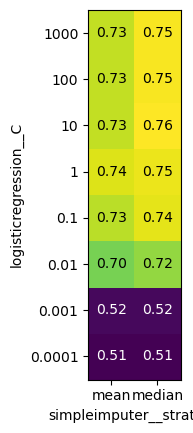

In [100]:
print(logistic)
scores = np.array(results.mean_test_score).reshape(8, 2, 1)
scores = scores[:,:,0]
# plot the mean cross-validation scores
heatmap(scores, xlabel='simpleimputer__strategy', xticklabels=param_grid['simpleimputer__strategy'], ylabel='logisticregression__C', yticklabels=param_grid['logisticregression__C'], cmap="viridis")
plt.show()


<Axes: >

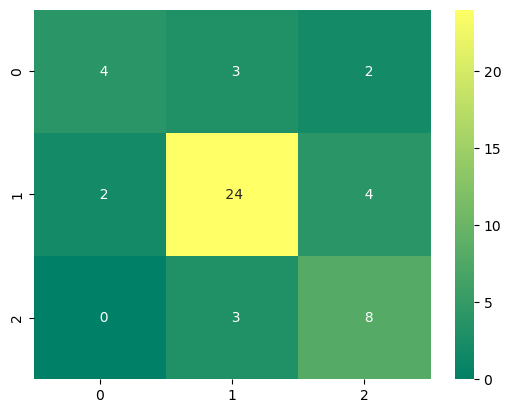

In [110]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val,y_pred),annot=True,fmt='3.0f',cmap="summer")


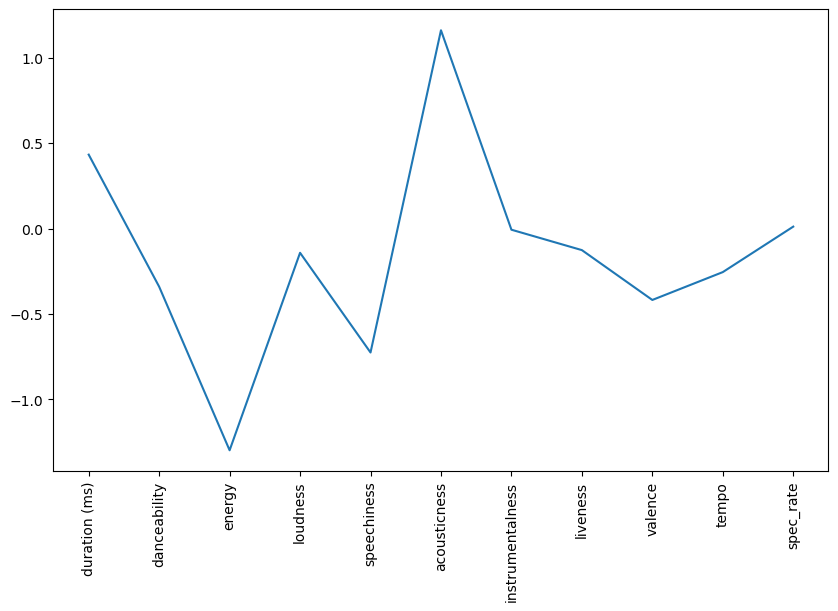

In [111]:
f, ax = plt.subplots(1,1,figsize=(10,6))

x=range(11)

columns = X.columns.tolist()

w=logistic["logisticregression"].coef_[0].reshape(-1,1)
ax.plot(x,w)

# print(data.columns)
ax.set_xticks(x)
ax.set_xticklabels(columns,rotation=90)



plt.show()

# Random Forests

In [112]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()

param_grid = {
    'randomforestclassifier__n_estimators': [10,20,30],
    'randomforestclassifier__max_depth': [None, 5, 10,15],
    'randomforestclassifier__min_samples_split': [2, 5, 10, 20],
    'randomforestclassifier__min_samples_leaf': [1, 2, 5]
}

rfc, scores = test(rfc, param_grid)

results = pd.DataFrame(scores)


y_pred=rfc.predict(X_val)
models.append(rfc)
model_names.append("Random Forest Classifier")
accuracy.append(accuracy_score(y_val,y_pred))

<Axes: >

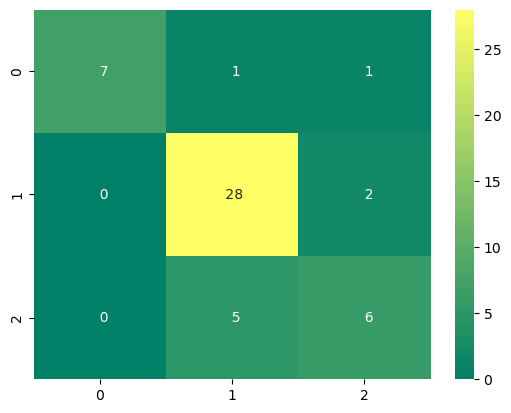

In [113]:
sns.heatmap(confusion_matrix(y_val,y_pred),annot=True,fmt='3.0f',cmap="summer")

# SVM

In [114]:
from sklearn.svm import SVC

svc = SVC()

param_grid = {
    'svc__C': [0.001,0.01,0.1, 1, 10,100],
    'svc__kernel': ['linear', 'rbf','sigmoid'],
    'svc__gamma': [0.001,0.01,0.1, 1, 10,100]
}

svc, scores = test(svc, param_grid)

results = pd.DataFrame(scores)


y_pred=svc.predict(X_val)

models.append(svc)
model_names.append("SVC")
accuracy.append(accuracy_score(y_val,y_pred))

<Axes: >

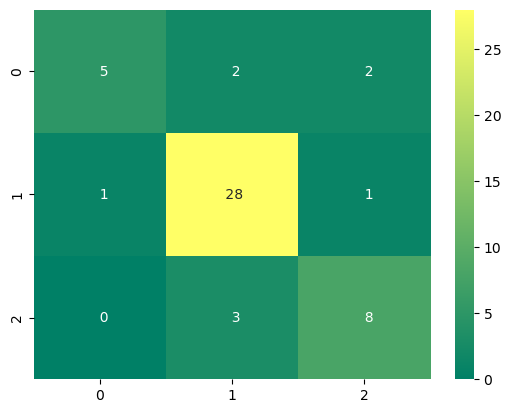

In [115]:
sns.heatmap(confusion_matrix(y_val,y_pred),annot=True,fmt='3.0f',cmap="summer")

# KNN

In [116]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

param_grid = {
    'kneighborsclassifier__n_neighbors': [5,10,15,20,25],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
}

knn, results = test(knn, param_grid)

results = pd.DataFrame(results)

y_pred=knn.predict(X_val)

models.append(knn)
model_names.append("K Nearest Neigbours")
accuracy.append(accuracy_score(y_val, y_pred))

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=10, weights='distance'))])


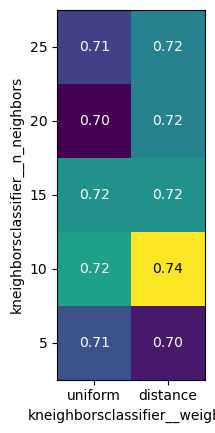

In [117]:
print(knn)
scores = np.array(results.mean_test_score).reshape(5, 2, 1)
scores = scores[:,:,0]
# plot the mean cross-validation scores
heatmap(scores, xlabel='kneighborsclassifier__weights', xticklabels=param_grid['kneighborsclassifier__weights'], ylabel='kneighborsclassifier__n_neighbors', yticklabels=param_grid['kneighborsclassifier__n_neighbors'], cmap="viridis")
plt.show()

plt.show()

<Axes: >

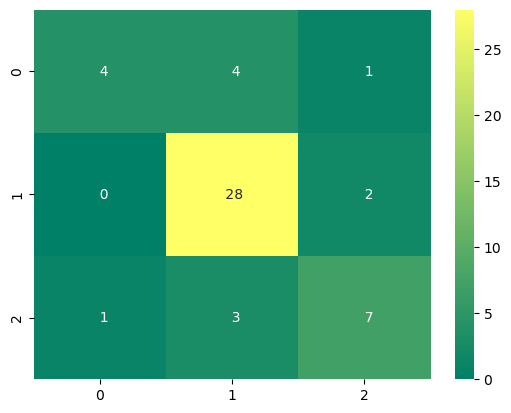

In [118]:
sns.heatmap(confusion_matrix(y_val,y_pred),annot=True,fmt='3.0f',cmap="summer")

# Decision Tree

In [121]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

param_grid = {
    'decisiontreeclassifier__max_depth': [None, 5, 10, 15, 20],
    'decisiontreeclassifier__min_samples_split': [2, 5, 7, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
}

dtc, results = test(dtc, param_grid)

results = pd.DataFrame(results)


y_pred=dtc.predict(X_val)

models.append(dtc)
model_names.append("Decision Trees")
accuracy.append(accuracy_score(y_val,y_pred))


In [49]:
print(models[-1])

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=2,
                                        min_samples_split=10))])


<Axes: >

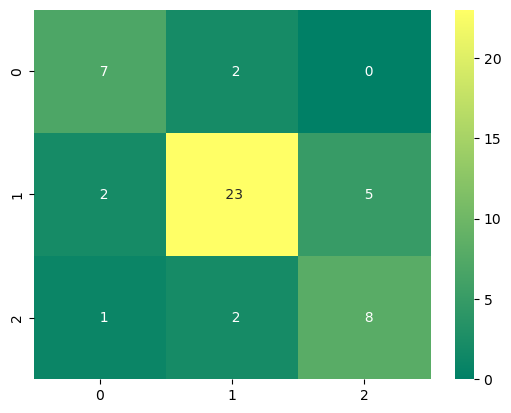

In [122]:
sns.heatmap(confusion_matrix(y_val,y_pred),annot=True,fmt='3.0f',cmap="summer")

In [126]:
df={'model' : model_names, 'accuracy ' : accuracy}
df=pd.DataFrame(df)
df

,model,accuracy
0,Logistic Regression,0.72
1,Random Forest Classifier,0.82
2,SVC,0.82
3,K Nearest Neigbours,0.78
4,Decision Trees,0.76
5,Decision Trees,0.76


Po sprawdzeniu kilku klasyfikatorów, zauważamy, że niektóre radzą sobie lepiej, wybierzemy 3 i stworzymy komitet głosujący

In [176]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(
    estimators=[('rfc', rfc), ('svc', svc), ('knn', knn)],
    voting='hard' )

voting_classifier.fit(X_train,y_train)

VotingClassifier(estimators=[('rfc',
                              Pipeline(steps=[('simpleimputer',
                                               SimpleImputer(strategy='median')),
                                              ('standardscaler',
                                               StandardScaler()),
                                              ('randomforestclassifier',
                                               RandomForestClassifier(n_estimators=20))])),
                             ('svc',
                              Pipeline(steps=[('simpleimputer',
                                               SimpleImputer(strategy='median')),
                                              ('standardscaler',
                                               StandardScaler()),
                                              ('svc',
                                               SVC(C=100, gamma=0.001))])),
                             ('knn',
                              Pipeline(steps=[('simpleimputer',
                                               SimpleImputer(strategy='median')),
                                              ('standardscaler',
                                               StandardScaler()),
                                              ('kneighborsclassifier',
                                               KNeighborsClassifier(n_neighbors=10,
                                                                    weights='distance'))]))])

In [179]:
y_pred=voting_classifier.predict(X_val)
print(accuracy_score(y_val, y_pred))

0.84


Zastosowanie komitetu klasyfikatorów sprawiło, że accuracy jest większe o 0.02, niż którykolwiek z klasyfiaktorów z osobna

Sprawdźmy jeszcze modele oparte na sieciach neuronowych

In [198]:
import tensorflow as tf
from tensorflow import keras

from keras.layers import Dense
from keras.layers import InputLayer
from keras.models import Sequential

X_train.shape

(400, 11)

Na początek prosty model

In [215]:
model1 = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=11),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(3, activation="softmax")
])

model.summary()

Model: "sequential_403"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1315 (Dense)          (None, 300)               3600      
                                                                 
 dense_1316 (Dense)          (None, 100)               30100     
                                                                 
 dense_1317 (Dense)          (None, 3)                 303       
                                                                 
Total params: 34,003
Trainable params: 34,003
Non-trainable params: 0
_________________________________________________________________


In [216]:
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])



In [217]:
history1 = model1.fit(X_train, y_train, epochs=30,
                    validation_data=(X_val, y_val))

Epoch 1/30
13/13 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.1975 - val_loss: nan - val_accuracy: 0.1800
Epoch 2/30
13/13 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1975 - val_loss: nan - val_accuracy: 0.1800
Epoch 3/30
13/13 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1975 - val_loss: nan - val_accuracy: 0.1800
Epoch 4/30
13/13 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1975 - val_loss: nan - val_accuracy: 0.1800
Epoch 5/30
13/13 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1975 - val_loss: nan - val_accuracy: 0.1800
Epoch 6/30
13/13 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1975 - val_loss: nan - val_accuracy: 0.1800
Epoch 7/30
13/13 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.1975 - val_loss: nan - val_accuracy: 0.1800
Epoch 8/30
13/13 [==============================] - 0s 2ms/ste